In [133]:
import pylab as pl
import numpy as np
import pandas as pd
import geopandas as gpd
%pylab inline
import statsmodels.formula.api as smf
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
from shapely.geometry import *
import pysal as ps
from scipy import stats


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'shape', 'box', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
pl.rcParams['font.size']= 18.0

In [74]:
! ls /scratch/share/mohitsharma44/cusp-hack-17

Datasets.zip
LAS
sonycnode-b827eb0d8af7.sonyc-2017-01.csv
sonycnode-b827eb2a1bce.sonyc-2017-01.csv
sonycnode-b827eb3bda47.sonyc-2017-01.csv
sonycnode-b827eb4cc22e.sonyc-2017-01.csv
sonycnode-b827ebad073b.sonyc-2017-01.csv


In [118]:
c22e = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb4cc22e.sonyc-2017-01.csv')
af7 = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb0d8af7.sonyc-2017-01.csv')
da47 = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827eb3bda47.sonyc-2017-01.csv')
d073b = pd.read_csv('/scratch/share/mohitsharma44/cusp-hack-17/sonycnode-b827ebad073b.sonyc-2017-01.csv')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,20,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mean = []
for i in range(0, len(d073b)):
     mean.append(d073b.time[i+1] - d073b.time[i])

In [125]:
def todatetime(df):
    df['time'] = pd.to_datetime(df.time)



In [127]:
todatetime(c22e)
todatetime(af7)
todatetime(da47)
todatetime(d073b)




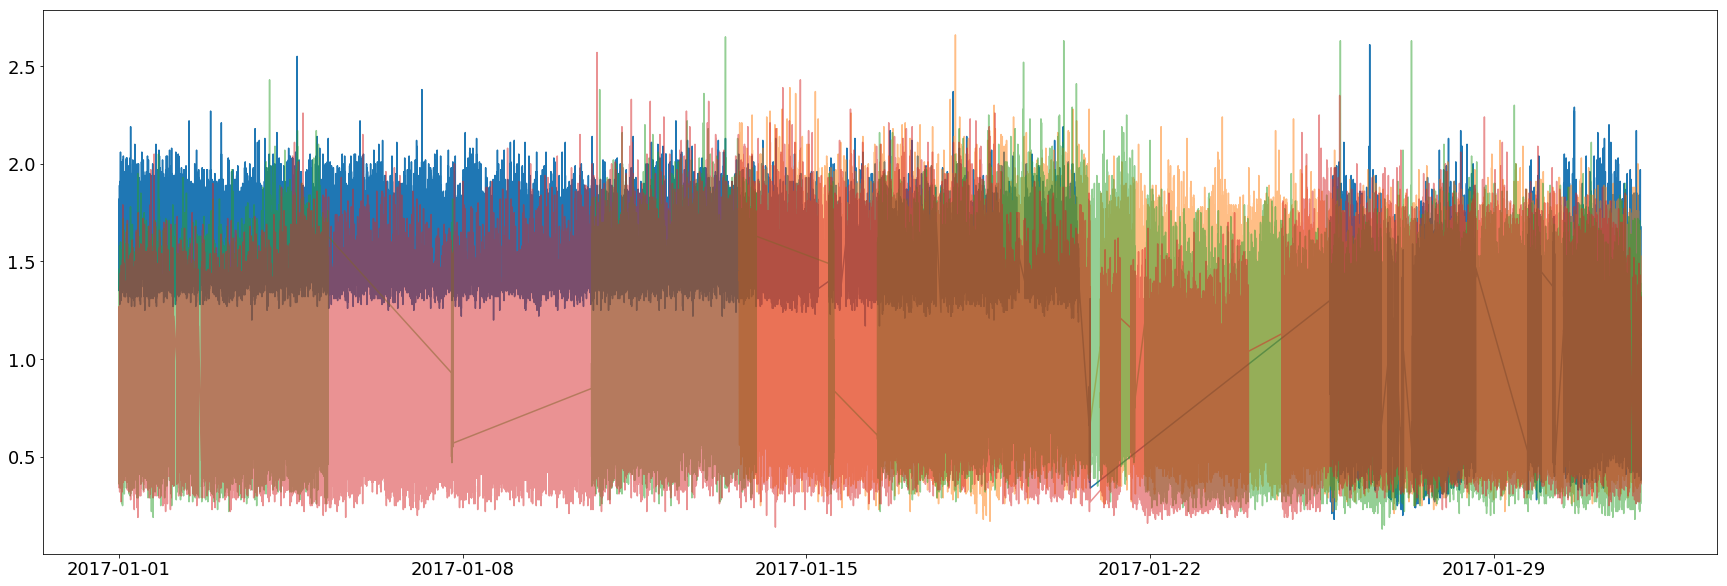

In [130]:
plt.plot(c22e.time, c22e.cpu_load_1)
plt.plot(af7.time, af7.cpu_load_1, alpha = 0.5)
plt.plot(da47.time, da47.cpu_load_1, alpha = 0.5)
plt.plot(d073b.time, d073b.cpu_load_1, alpha = 0.5)

In [132]:
np.fft.rfft(c22e.cpu_load_1)
np.fft.rfft(af7.cpu_load_1)
np.fft.rfft(da47.cpu_load_1)
np.fft.rfft(d073b.cpu_load_1)

array([  4.69573630e+05   +0.j        ,  -5.43623621e+03-9121.14494766j,
        -8.73070295e+03+2899.45276645j, ...,
        -5.17870603e-02  -10.24908156j,   1.36167966e+00  -16.48607132j,
        -1.24704193e+01  -18.66686178j])

NameError: name 'period' is not defined

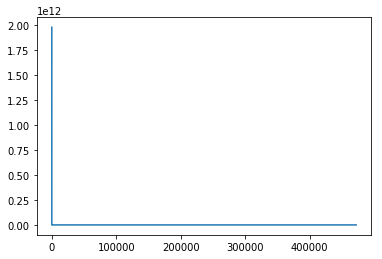

In [134]:
pl.plot(np.square((np.fft.rfft(c22e.cpu_load_1).real)));
pl.title ("power sopectrum of period=%.2f sine wave"%period)
pl.xlabel("?")
pl.ylabel("?")

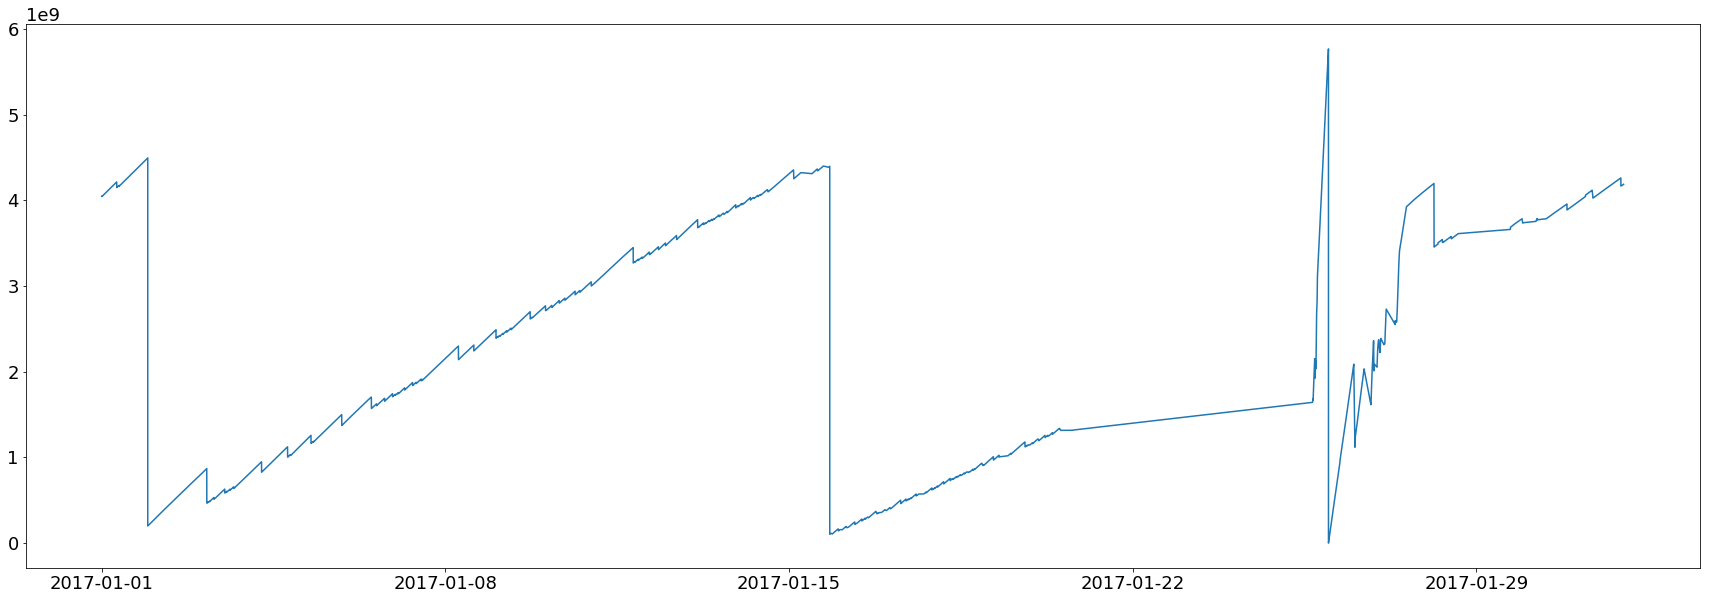

In [81]:
fig = figsize(30,10)
plt.plot(bad.time, bad.TX_packets)
# plt.xlim()

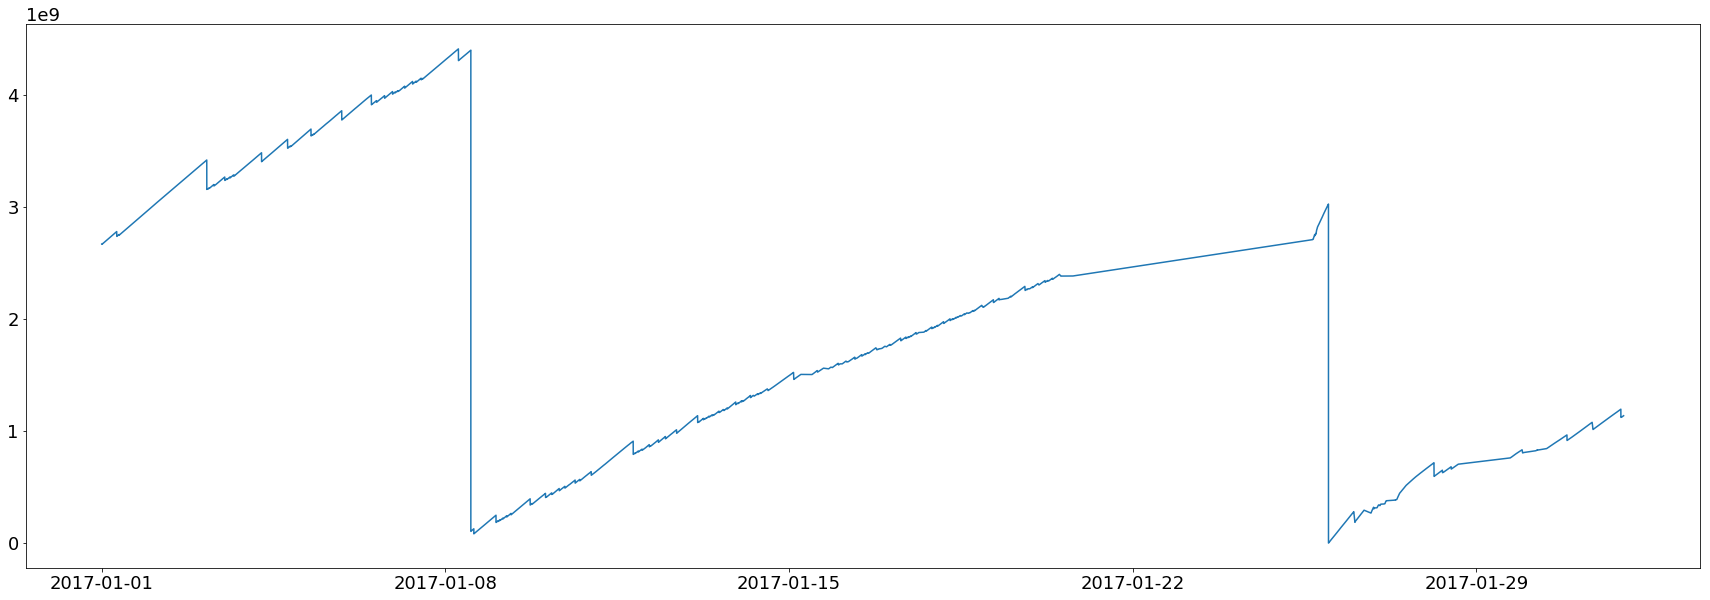

In [82]:
fig = figsize(30,10)
plt.plot(bad.time, bad.RX_packets)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'cpu_load_1')

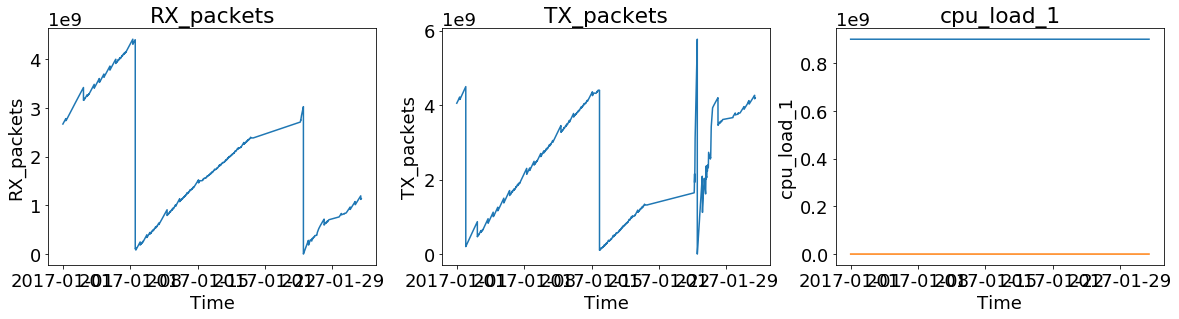

In [102]:

#Set total figure size
pl.figure(figsize=(20,20))

###############################################################################

# Plot RX_packets
pl.subplot(431) # Plot 1
pl.plot(bad.time, bad.RX_packets)

# Format Plot
pl.xlabel("Time")
pl.ylabel("RX_packets")
pl.title("RX_packets")

###############################################################################

# Plot TX_packets
pl.subplot(432) # Plot 1
pl.plot(bad.time, bad.TX_packets)

# Format Plot
pl.xlabel("Time")
pl.ylabel("TX_packets")
pl.title("TX_packets")

###############################################################################

# Plot CPU_cur_freq
pl.subplot(433) # Plot 1
pl.plot(bad.time, bad.cpu_cur_freq)

# Format Plot
pl.xlabel("Time")
pl.ylabel("CPU_cur_freq")
pl.title("CPU_cur_freq")

###############################################################################

# Plot cpu_load_1
pl.subplot(433) # Plot 1
pl.plot(bad.time, bad.cpu_load_1)

# Format Plot
pl.xlabel("Time")
pl.ylabel("cpu_load_1")
pl.title("cpu_load_1")

In [103]:
RX = np.array(bad.RX_packets)

In [115]:
def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
 
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac
       
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean(),
            'Q' : Q,
            'U' : U}

In [116]:
changeFinder(RX)

{'Q': 1945064366181040,
 'U': -4.1387406684821412e+18,
 'meanAfter': 2058649983.2374365,
 'meanBefore': 2669723279.0,
 'pChange': array([ nan,  nan,  nan, ...,  nan,  nan,  nan]),
 'pointOfChange': 1}

In [ ]:
(-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

In [106]:

pochange = changeFinder(RX)
pochange['pointOfChange']

1

In [109]:
pochange['pChange']

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

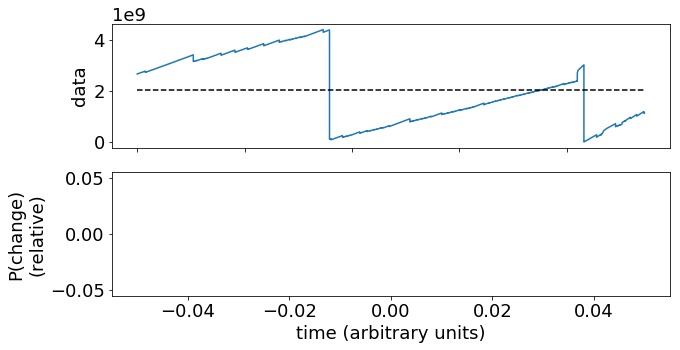

In [107]:

fig = pl.figure(figsize=(10,5))
ax1 = pl.subplot(211)
ax1.plot(range(len(RX)), RX)
# ax1.plot([0,100], [0,0], '-')
# ax1.plot([100,200], [3,3], '-')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("data")

ax2 = pl.subplot(212)
ax2.plot(range(len(RX)), 
        pochange['pChange'], color="IndianRed")
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(RX)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax2.set_ylabel("P(change)\n(relative)")
ax2.set_xlabel("time (arbitrary units)");

In [94]:
bad.columns

Index(['Unnamed: 0', 'AP', 'RX_packets', 'TX_packets', 'branch', 'commit_date',
       'commits', 'cpu_cur_freq', 'cpu_load_1', 'cpu_load_15', 'cpu_load_5',
       'cpu_max_freq', 'cpu_min_freq', 'cpu_temp', 'disk_part', 'eth0_mac',
       'fqdn', 'ingestion_server', 'laeq', 'lceq', 'level_time', 'lzeq',
       'mem_available', 'mem_percent', 'mem_total', 'mem_used', 'music_usage',
       'nodeid', 'position', 'root_usage', 'running_proc', 'time', 'tmp_usage',
       'tun0_ip', 'usb_dev', 'wlan0_ip', 'wlan0_mac'],
      dtype='object')

In [95]:
bad.cpu_cur_freq.describe()

count    9.448260e+05
mean     9.000000e+08
std      6.026000e+02
min      8.999980e+08
25%      9.000000e+08
50%      9.000000e+08
75%      9.000000e+08
max      9.000960e+08
Name: cpu_cur_freq, dtype: float64

In [96]:
bad.head()

,Unnamed: 0,AP,RX_packets,TX_packets,branch,commit_date,commits,cpu_cur_freq,cpu_load_1,cpu_load_15,...,nodeid,position,root_usage,running_proc,time,tmp_usage,tun0_ip,usb_dev,wlan0_ip,wlan0_mac
0,0,nyu-legacy,2669723279,4048987520,NaN,NaN,[{'id': ''}],900000000,1.54,1.60,...,74da385c6836,"{'lon': '-73.995715', 'lat': '40.729384'}",84.5,104,2017-01-01 00:00:01.089786,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
1,1,nyu-legacy,2669730996,4048999231,NaN,NaN,[{'id': ''}],900000000,1.50,1.59,...,74da385c6836,"{'lon': '-73.995715', 'lat': '40.729384'}",84.5,104,2017-01-01 00:00:02.836216,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
2,2,nyu-legacy,2669738211,4049009946,NaN,NaN,[{'id': ''}],900000000,1.50,1.59,...,74da385c6836,"{'lon': '-73.995715', 'lat': '40.729384'}",84.5,104,2017-01-01 00:00:04.448516,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
3,3,nyu-legacy,2669745426,4049020661,NaN,NaN,[{'id': ''}],900000000,1.50,1.59,...,74da385c6836,"{'lon': '-73.995715', 'lat': '40.729384'}",84.5,104,2017-01-01 00:00:06.039129,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
4,4,nyu-legacy,2669752641,4049031436,NaN,NaN,[{'id': ''}],900000000,1.54,1.59,...,74da385c6836,"{'lon': '-73.995715', 'lat': '40.729384'}",84.5,104,2017-01-01 00:00:07.707159,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN


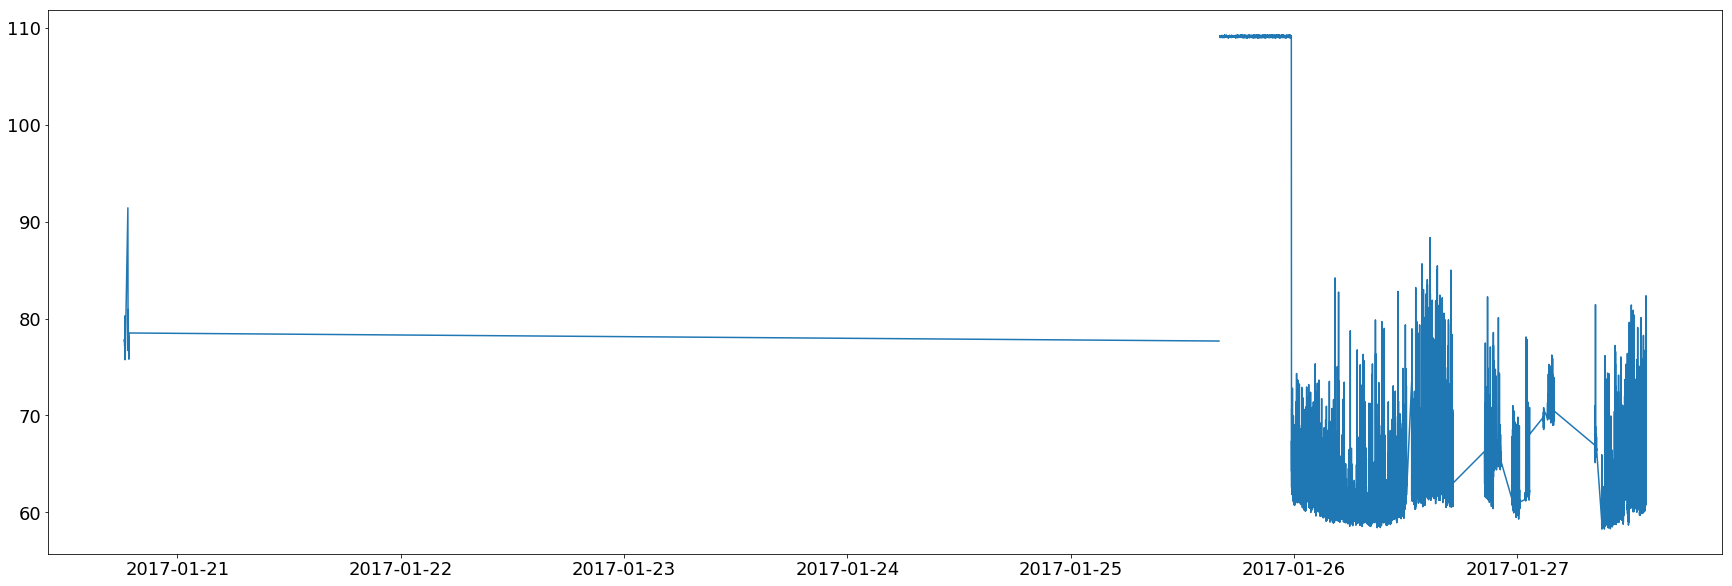

In [97]:
fig = figsize(30,10)
plt.plot(bad.time, bad.laeq)
# plt.plot(bad.time, bad.cpu_load_15)

In [98]:
bad.columns

Index(['Unnamed: 0', 'AP', 'RX_packets', 'TX_packets', 'branch', 'commit_date',
       'commits', 'cpu_cur_freq', 'cpu_load_1', 'cpu_load_15', 'cpu_load_5',
       'cpu_max_freq', 'cpu_min_freq', 'cpu_temp', 'disk_part', 'eth0_mac',
       'fqdn', 'ingestion_server', 'laeq', 'lceq', 'level_time', 'lzeq',
       'mem_available', 'mem_percent', 'mem_total', 'mem_used', 'music_usage',
       'nodeid', 'position', 'root_usage', 'running_proc', 'time', 'tmp_usage',
       'tun0_ip', 'usb_dev', 'wlan0_ip', 'wlan0_mac'],
      dtype='object')

In [99]:
cpu_load_1 = np.array(bad.laeq)

In [100]:

pochange = changeFinder(cpu_load_1)
pochange['pointOfChange']

1

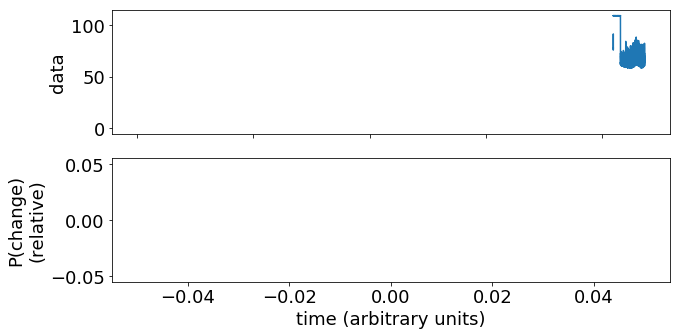

In [101]:

fig = pl.figure(figsize=(10,5))
ax1 = pl.subplot(211)
ax1.plot(range(len(cpu_load_1)), cpu_load_1)
ax1.plot([0,100], [0,0], '-')
ax1.plot([100,200], [3,3], '-')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("data")

ax2 = pl.subplot(212)
ax2.plot(range(len(cpu_load_1)), 
        pochange['pChange'], color="IndianRed")
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(cpu_load_1)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax2.set_ylabel("P(change)\n(relative)")
ax2.set_xlabel("time (arbitrary units)");

### Work on GIS

In [29]:
bad['lon'] = bad.position.str[9:19].astype(float)

In [31]:
bad['lat'] = bad.position.str[30:39].astype(float)

In [32]:
# Transforming crime dataset into a GeoDataFrame
geometry = [Point(x) for x in zip(bad['lon'], bad['lat'])]

# Assign geometry as the geometry feature of the dataframe and configuring espg as 4326
# to learn more: https://en.wikipedia.org/wiki/World_Geodetic_System
crs = {'init': 'epsg:4326'}
bad_shp = gpd.GeoDataFrame(bad, crs=crs, geometry=geometry) 
bad_shp.head(3)


,Unnamed: 0,AP,RX_packets,TX_packets,branch,commit_date,commits,cpu_cur_freq,cpu_load_1,cpu_load_15,...,running_proc,time,tmp_usage,tun0_ip,usb_dev,wlan0_ip,wlan0_mac,lon,lat,geometry
0,0,nyu-legacy,1712140864,3995228131,NaN,NaN,[{'id': ''}],900000000,1.18,1.03,...,104,2017-01-01 00:00:03.213502,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN,-73.994374,40.729514,POINT (-73.99437399999999 40.729514)
1,1,nyu-legacy,1712148079,3995238846,NaN,NaN,[{'id': ''}],900000000,1.18,1.03,...,104,2017-01-01 00:00:05.036621,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN,-73.994374,40.729514,POINT (-73.99437399999999 40.729514)
2,2,nyu-legacy,1712157641,3995251417,NaN,NaN,[{'id': ''}],900000000,1.16,1.03,...,105,2017-01-01 00:00:08.154739,2.6,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN,-73.994374,40.729514,POINT (-73.99437399999999 40.729514)


In [71]:
bad_shp.iloc[1,:]

Unnamed: 0                                                          1
AP                                                         nyu-legacy
RX_packets                                                 1712148079
TX_packets                                                 3995238846
branch                                                            NaN
commit_date                                                       NaN
commits                                                  [{'id': ''}]
cpu_cur_freq                                                900000000
cpu_load_1                                                       1.18
cpu_load_15                                                      1.03
cpu_load_5                                                       1.08
cpu_max_freq                                                   900000
cpu_min_freq                                                   600000
cpu_temp                                                         34.7
disk_part           

In [73]:
bad

,Unnamed: 0,AP,RX_packets,TX_packets,branch,commit_date,commits,cpu_cur_freq,cpu_load_1,cpu_load_15,...,nodeid,position,root_usage,running_proc,time,tmp_usage,tun0_ip,usb_dev,wlan0_ip,wlan0_mac
0,0,nyu-legacy,102432,110082,NaN,NaN,[{'id': ''}],600064000,1.46,0.18,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,124,2017-01-13 15:14:39.771756,2.6,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
1,1,nyu-legacy,173051,1115260,NaN,NaN,[{'id': ''}],600000000,1.46,0.20,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,126,2017-01-13 15:14:48.599780,0.0,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
2,2,nyu-legacy,225364,1898749,NaN,NaN,[{'id': ''}],600000000,1.46,0.20,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,127,2017-01-13 15:14:52.757607,2.4,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
3,3,nyu-legacy,287752,2640884,NaN,NaN,[{'id': ''}],600000000,1.58,0.21,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,128,2017-01-13 15:14:57.661405,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
4,4,nyu-legacy,363991,3696340,NaN,NaN,[{'id': ''}],600000000,1.70,0.23,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,130,2017-01-13 15:15:02.908647,2.3,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
5,5,nyu-legacy,393139,3741336,NaN,NaN,[{'id': ''}],600000000,1.88,0.25,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,130,2017-01-13 15:15:06.638186,0.1,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
6,6,nyu-legacy,448045,4544784,NaN,NaN,[{'id': ''}],600000000,1.81,0.25,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,129,2017-01-13 15:15:11.687899,2.0,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
7,7,nyu-legacy,464311,4565419,NaN,NaN,[{'id': ''}],600000000,1.83,0.26,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,128,2017-01-13 15:15:15.208462,0.2,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
8,8,nyu-legacy,483615,4587801,NaN,NaN,[{'id': ''}],900000000,1.83,0.26,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,129,2017-01-13 15:15:18.588908,0.2,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN
9,9,nyu-legacy,507144,4613651,NaN,NaN,[{'id': ''}],599998000,1.84,0.27,...,74da385c6860,"{'lon': '-73.993588', 'lat': '40.729432'}",84.6,128,2017-01-13 15:15:21.990504,2.2,NaN,Bus 001 Device 005: ID 7392:7811 Edimax Techno...,NaN,NaN


In [46]:
gis = pd.DataFrame(bad_shp.iloc[1,:])

In [47]:
gis.head()

,1
Unnamed: 0,1
AP,nyu-legacy
RX_packets,1712148079
TX_packets,3995238846
branch,NaN


In [ ]:
nynta = gpd.read_file('/home/cusp/sk6176/GIS_Project/nynta/nynta_17d/nynta.shp')

AttributeError: No geometry data set yet (expected in column 'geometry'.

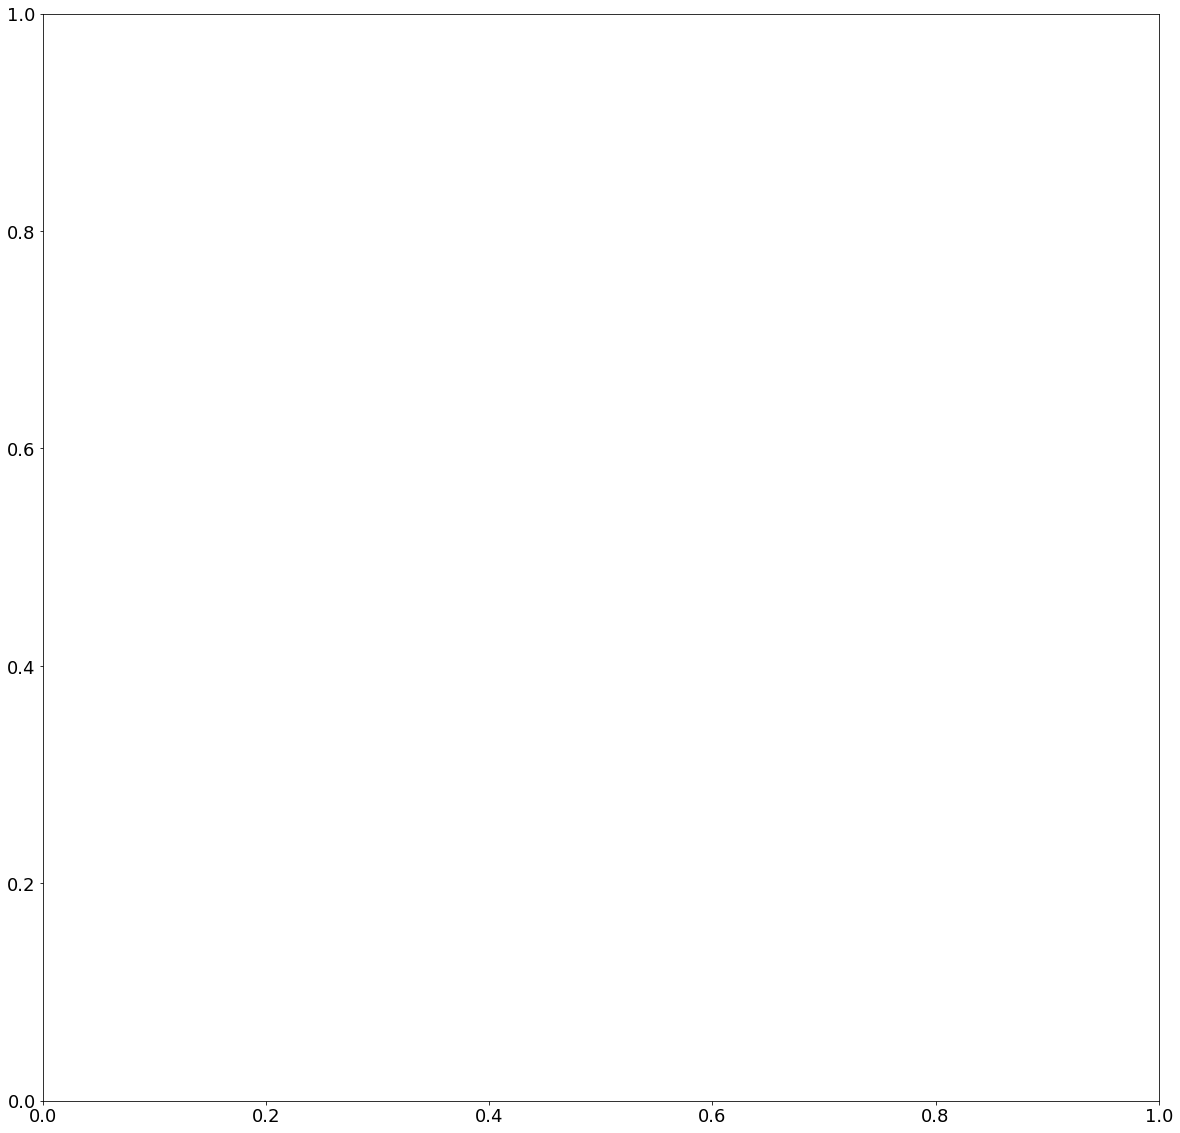

In [40]:
f, ax = plt.subplots(figsize=(20,20))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
gis.plot(color='white', edgecolor='black', linewidth = 0.1 ,ax =ax)

plt.title('NTACode')